Consider a coordinate system N.Suppose we want to define a new system M, whose origin is located at 3i +4j+5k 
from N’s origin.In other words, the coordinates of M’s origin from N’s perspective happen to be (3,4,5).Moreover,this would also mean that the coordinates of ’s origin with respect to  would be (-3,-4,-5).

In [1]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
M = N.locate_new('M', 3*N.i + 4*N.j + 5*N.k)

In [2]:
M.position_wrt(N)

3*N.i + 4*N.j + 5*N.k

In [3]:
N.origin.express_coordinates(M)

(-3, -4, -5)

Orienting new systems

Similar to ‘locating’ new systems, sympy.vector also allows for initialization of new CoordSys3D instances 
that are oriented in user-defined ways with respect to existing systems.
Suppose you have a coordinate system A.You want to initialize a new coordinate system B, that is rotated with respect to A’s Z-axis by an angle \theta
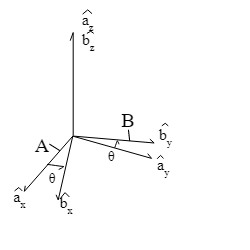

In [4]:
from sympy.vector import CoordSys3D
from sympy import Symbol

A = CoordSys3D('A')
theta = Symbol('theta')

In [5]:
##Method 1 : Using a method of CoordSys3D directly . a)orient_new_axis, b)orient_new_body, c)orient_new_space,  d)orient_new_quaternion
B = A.orient_new_axis('B', theta, A.k)

In [6]:
## MEthod 2:  
#You would first have to initialize an AxisOrienter instance for storing the rotation information.
#And then apply it using the orient_new method, to obtain B.
from sympy.vector import AxisOrienter
axis_orienter = AxisOrienter(theta, A.k)
B = A.orient_new('B', axis_orienter)

orient_new also lets you orient new systems using multiple Orienter instances, provided in an iterable. The rotations/orientations are applied to the new system in the order the Orienter instances appear in the iterable.

In [7]:
from sympy.vector import BodyOrienter
from sympy.abc import a, b, c
body_orienter = BodyOrienter(a, b, c, 'XYZ')
C = A.orient_new('C', (axis_orienter, body_orienter))

In each of the above examples, the origin of the new coordinate system coincides with the origin of the ‘parent’ system.

In [8]:
B.position_wrt(A)

0

To compute the rotation matrix of any coordinate system with respect to another one, use the rotation_matrix method.

In [9]:
B = A.orient_new_axis('B', a,A.k) #A.k is axis
B.rotation_matrix(A)
#B.rotation_matrix(B)

Matrix([
[ cos(a), sin(a), 0],
[-sin(a), cos(a), 0],
[      0,      0, 1]])

Orienting AND Locating new systems

orientation methods also act as methods to support orientation+ location of the new systems.

In [10]:
C = A.orient_new_axis('C', a, A.k, location=2*A.j)
C.position_wrt(A)

2*A.j

In [11]:
from sympy.vector import express
express(A.position_wrt(C), C)

(-2*sin(a))*C.i + (-2*cos(a))*C.j

Transforming new system

In [12]:
from sympy.vector import CoordSys3D
from sympy import sin, cos
A = CoordSys3D('A', transformation='spherical')
B = CoordSys3D('A', transformation=lambda x,y,z: (x*sin(y), x*cos(y), z))

In [13]:
##(or) Methpd 2
from sympy.vector import CoordSys3D
A = CoordSys3D('A')
B = A.create_new('B', transformation='spherical')

Expression of quantities in different coordinate systems

In [14]:
from sympy.vector import CoordSys3D, express
from sympy.abc import a, b, c
N = CoordSys3D('N')
M = N.orient_new_axis('M', a, N.k)

In [15]:
v1 = N.i + N.j + N.k
express(v1, M)

(sin(a) + cos(a))*M.i + (-sin(a) + cos(a))*M.j + M.k

In [16]:
v2 = N.i + M.j
express(v2, N)

(1 - sin(a))*N.i + (cos(a))*N.j

Coordinate Variables
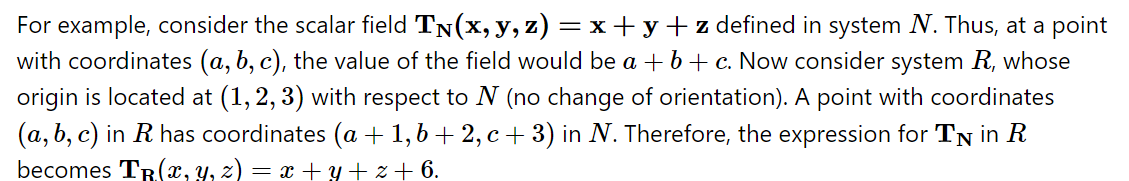


In [17]:
R = N.locate_new('R', N.i + 2*N.j + 3*N.k)
T_N = N.x + N.y + N.z
express(T_N, R, variables=True)

R.x + R.y + R.z + 6

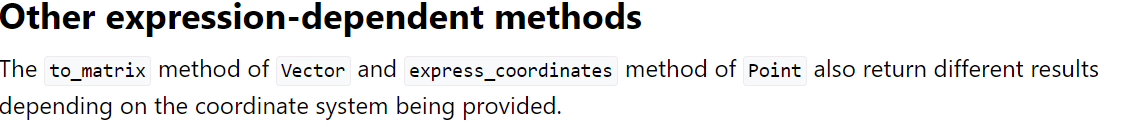

In [18]:
P = R.origin.locate_new('P', a*R.i + b*R.j + c*R.k)
P.express_coordinates(N)

(a + 1, b + 2, c + 3)

In [19]:
P.express_coordinates(R)

(a, b, c)

In [20]:
v = N.i + N.j + N.k
v.to_matrix(M)

Matrix([
[ sin(a) + cos(a)],
[-sin(a) + cos(a)],
[               1]])

In [21]:
v.to_matrix(N)

Matrix([
[1],
[1],
[1]])

Scalar and Vector Field Functionality

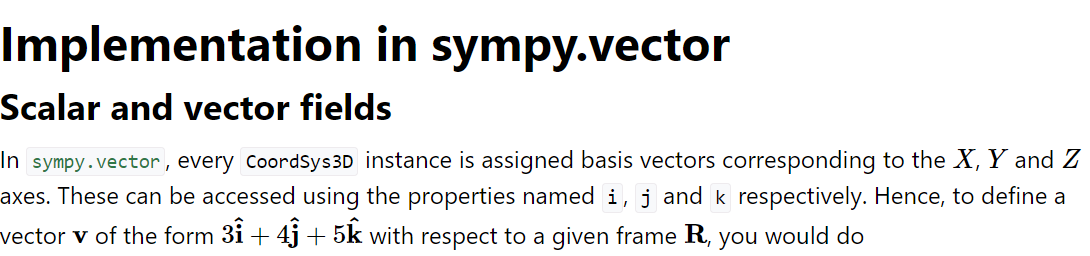

In [22]:
from sympy.vector import CoordSys3D
R = CoordSys3D('R')
v = 3*R.i + 4*R.j + 5*R.k

In [23]:
from sympy.vector import CoordSys3D
R = CoordSys3D('R')
electric_potential = 2*R.x**2*R.y
electric_potential

2*R.x**2*R.y

In [24]:
from sympy import diff
diff(electric_potential, R.x)

4*R.x*R.y

In [25]:
from sympy.vector import CoordSys3D
R = CoordSys3D('R')
v = R.x**2*R.i + 2*R.x*R.z*R.k # variation with position

The Del operator
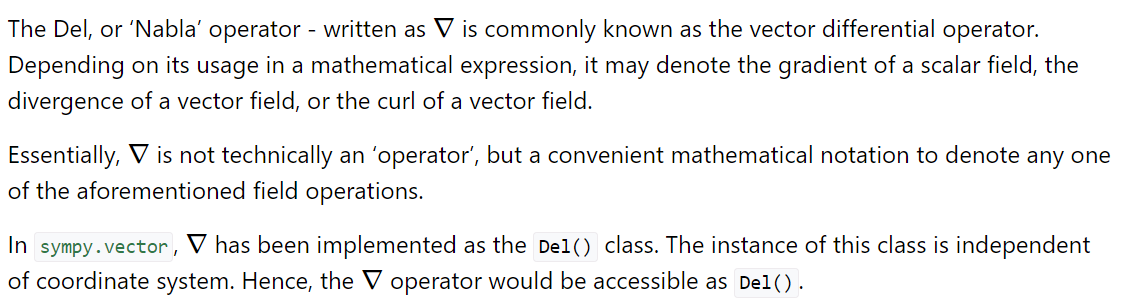

In [26]:
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')
delop = Del()
gradient_field = delop(C.x*C.y*C.z)
gradient_field.simplify()

C.y*C.z*C.i + C.x*C.z*C.j + C.x*C.y*C.k

Field operators and related functions

In [27]:
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')
delop = Del()
delop.cross(C.x*C.y*C.z*C.i).doit()

C.x*C.y*C.j + (-C.x*C.z)*C.k

In [28]:
(delop ^ C.x*C.y*C.z*C.i).doit()

C.x*C.y*C.j + (-C.x*C.z)*C.k

In [29]:
#Method 2:
from sympy.vector import curl
curl(C.x*C.y*C.z*C.i)

C.x*C.y*C.j + (-C.x*C.z)*C.k

Divergence

In [30]:
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')
delop = Del()
delop.dot(C.x*C.y*C.z*(C.i + C.j + C.k)).doit()

C.x*C.y + C.x*C.z + C.y*C.z

In [31]:
(delop & C.x*C.y*C.z*(C.i + C.j + C.k)).doit()

C.x*C.y + C.x*C.z + C.y*C.z

In [32]:
#Method 2
from sympy.vector import divergence
divergence(C.x*C.y*C.z*(C.i + C.j + C.k))

C.x*C.y + C.x*C.z + C.y*C.z

Gradient

In [33]:
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')
delop = Del()
delop.gradient(C.x*C.y*C.z).doit()

C.y*C.z*C.i + C.x*C.z*C.j + C.x*C.y*C.k

In [34]:
delop(C.x*C.y*C.z).doit()

C.y*C.z*C.i + C.x*C.z*C.j + C.x*C.y*C.k

In [35]:
#method 2
from sympy.vector import gradient
gradient(C.x*C.y*C.z)

C.y*C.z*C.i + C.x*C.z*C.j + C.x*C.y*C.k

Directional Derivative
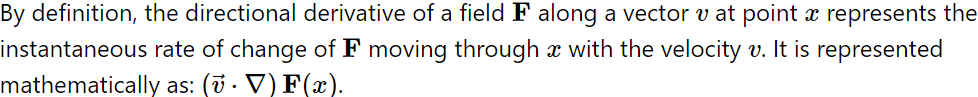

In [36]:
from sympy.vector import CoordSys3D, Del
C = CoordSys3D('C')
delop = Del()
vel = C.i + C.j + C.k
scalar_field = C.x*C.y*C.z
vector_field = C.x*C.y*C.z*C.i
(vel.dot(delop))(scalar_field)

C.x*C.y + C.x*C.z + C.y*C.z

In [37]:
(vel & delop)(vector_field)

(C.x*C.y + C.x*C.z + C.y*C.z)*C.i

In [38]:
#Method 2:
from sympy.vector import directional_derivative
directional_derivative(C.x*C.y*C.z, 3*C.i + 4*C.j + C.k)

C.x*C.y + 4*C.x*C.z + 3*C.y*C.z

Field operator in orthogonal curvilinear coordinate system

vector package supports calculation in different kind of orthogonal curvilinear coordinate system. To do that, scaling factor (also known as Lame coefficients) are used to express curl, divergence or gradient in desired type of coordinate system.

For example if we want to calculate gradient in cylindrical coordinate system all we need to do is to create proper coordinate system

In [39]:
from sympy.vector import CoordSys3D
c = CoordSys3D('c', transformation='cylindrical', variable_names=("r", "theta", "z"))
gradient(c.r*c.theta*c.z)

c.theta*c.z*c.i + c.z*c.j + c.r*c.theta*c.k

Conservative and Solenoidal fields

In vector calculus, a conservative field is a field that is the gradient of some scalar field. Conservative fields have the property that their line integral over any path depends only on the end-points, and is independent of the path travelled. A conservative vector field is also said to be ‘irrotational’, since the curl of a conservative field is always zero.

In physics, conservative fields represent forces in physical systems where energy is conserved.

To check if a vector field is conservative in sympy.vector, the is_conservative function can be used.

In [40]:
from sympy.vector import CoordSys3D, is_conservative
R = CoordSys3D('R')
field = R.y*R.z*R.i + R.x*R.z*R.j + R.x*R.y*R.k
is_conservative(field)

True

In [41]:
curl(field)

0

A solenoidal field, on the other hand, is a vector field whose divergence is zero at all points in space.

To check if a vector field is solenoidal in sympy.vector, the is_solenoidal function can be used.

In [42]:
from sympy.vector import CoordSys3D, is_solenoidal
R = CoordSys3D('R')
field = R.y*R.z*R.i + R.x*R.z*R.j + R.x*R.y*R.k
is_solenoidal(field)

True

In [43]:
divergence(field)

0

Scalar potential functions

We have previously mentioned that every conservative field can be defined as the gradient of some scalar field.
This scalar field is also called the ‘scalar potential field’ corresponding to the aforementioned conservative field.
The scalar_potential function in sympy.vector calculates the scalar potential field corresponding to a given 
conservative vector field in 3D space - minus the extra constant of integration, of course.

In [44]:
from sympy.vector import CoordSys3D, scalar_potential
R = CoordSys3D('R')
conservative_field = 4*R.x*R.y*R.z*R.i + 2*R.x**2*R.z*R.j + 2*R.x**2*R.y*R.k
scalar_potential(conservative_field, R)

2*R.x**2*R.y*R.z

Providing a non-conservative vector field as an argument to scalar_potential raises a ValueError.

The scalar potential difference, or simply ‘potential difference’, corresponding to a conservative vector field can be defined as the difference between the values of its scalar potential function at two points in space. This is useful in calculating a line integral with respect to a conservative function, since it depends only on the endpoints of the path.

In [45]:
from sympy.vector import CoordSys3D, Point
from sympy.vector import scalar_potential_difference
R = CoordSys3D('R')
P = R.origin.locate_new('P', 1*R.i + 2*R.j + 3*R.k)
vectfield = 4*R.x*R.y*R.i + 2*R.x**2*R.j
scalar_potential_difference(vectfield, R, R.origin, P)

4

If provided with a scalar expression instead of a vector field, scalar_potential_difference returns the difference between the values of that scalar field at the two given points in space.

EXAMPLES:
1)OABC is any quadrilateral in 3D space. P is the midpoint of OA, Q is the midpoint of AB, 
R is the midpoint of BC and S is the midpoint of OC. Prove that PQ is parallel to SR

In [46]:
from sympy.vector import CoordSys3D

#Define a coordinate system
Sys = CoordSys3D('Sys')

#Define point O to be Sys’ origin. We can do this without loss of generality
O = Sys.origin

#Define point A,B,C with respect to O
from sympy import symbols
a1, a2, a3 = symbols('a1 a2 a3')
A = O.locate_new('A', a1*Sys.i + a2*Sys.j + a3*Sys.k)
b1, b2, b3 = symbols('b1 b2 b3')
B = O.locate_new('B', b1*Sys.i + b2*Sys.j + b3*Sys.k)
c1, c2, c3 = symbols('c1 c2 c3')
C = O.locate_new('C', c1*Sys.i + c2*Sys.j + c3*Sys.k)

#P is the midpoint of OA. Lets locate it with respect to O (you could also define it with respect to A).
#Similarly define points Q, R and S as per the problem definitions.
P = O.locate_new('P', A.position_wrt(O) + (O.position_wrt(A) / 2))
Q = A.locate_new('Q', B.position_wrt(A) / 2)
R = B.locate_new('R', C.position_wrt(B) / 2)
S = O.locate_new('R', C.position_wrt(O) / 2)

#compute the vectors in the directions specified by PQ and SR.
PQ = Q.position_wrt(P)
SR = R.position_wrt(S)

#compute cross product
PQ.cross(SR)

0

q2) Third product rule for Del operator


In [47]:
#Start with a coordinate system
from sympy.vector import CoordSys3D, Del
delop = Del()
C = CoordSys3D('C')

#The scalar field f,the measure numbers of the vector field v bar are all functions of the coordinate variables of the 
#coordinate system in general. Hence, define SymPy functions that way.

from sympy import symbols, Function
v1, v2, v3, f = symbols('v1 v2 v3 f', cls=Function)

#Define the vector field as vfield and the scalar field as sfield
vfield = v1(C.x, C.y, C.z)*C.i + v2(C.x, C.y, C.z)*C.j + v3(C.x, C.y, C.z)*C.k
ffield = f(C.x, C.y, C.z)

#Construct the expression for the LHS,RHS of the equation using Del()
lhs = (delop.dot(ffield * vfield)).doit()
rhs = ((vfield.dot(delop(ffield))) + (ffield * (delop.dot(vfield)))).doit()

#To prove
lhs.expand().simplify() == rhs.expand().doit().simplify()

True

Applications of Vector Integrals

To integrate a scalar or vector field over a region, we have to first define a region. SymPy provides three methods for defining a region:
Using Parametric Equations with ParametricRegion.
Using Implicit Equation with ImplicitRegion.
Using objects of geometry module.

The vector_integrate() function is used to integrate scalar or vector field over any type of region. It automatically determines the type of integration (line, surface, or volume) depending on the nature of the object.

We define a coordinate system and make necesssary imports for examples.

In [3]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

#To calculate the perimeter of a circle, we need to define it. Let’s define it using its parametric equation.
param_circle = ParametricRegion((4*cos(theta), 4*sin(theta)), (theta, 0, 2*pi))

#We can also define a circle using its implicit equation.
implicit_circle = ImplicitRegion((x, y), x**2 + y**2 - 4)

#The perimeter of a figure is equal to the absolute value of its integral over a unit scalar field.
vector_integrate(1, param_circle)

8*pi

In [4]:
vector_integrate(1, implicit_circle)

4*pi

In [5]:
from sympy.geometry import Point, Polygon
triangle = Polygon(Point(1, 2), (3, 5), (1,6))
vector_integrate(1, triangle)

sqrt(5) + sqrt(13) + 4

In [6]:
#To define a solid sphere, we need to use three parameters (r, theta and phi).
#For ParametricRegion obextj, the order of limits determine the sign of the integral.
solidsphere = ParametricRegion((r*sin(phi)*cos(theta),r*sin(phi)*sin(theta), r*cos(phi)),
                            (phi, 0, pi), (theta, 0, 2*pi), (r, 0, 3))
vector_integrate(1, solidsphere)

36*pi

Calculation of mass of a body

Consider a triangular lamina 𝑅 with vertices (0,0), (0, 5), (5,0) and with rho(x,y)=xy. Find the total mass.

In [7]:
triangle = ParametricRegion((x, y), (x, 0, 5), (y, 0, 5 - x))
vector_integrate(C.x*C.y, triangle)

625/24

Find the mass of a cylinder centered on the z-axis which has height h, radius a, and density rho=x^2+y^2

In [8]:
a, h = symbols('a h', positive=True)
cylinder = ParametricRegion((r*cos(theta), r*sin(theta), z),
                    (theta, 0, 2*pi), (z, 0, h), (r, 0, a))
vector_integrate(C.x**2 + C.y**2, cylinder)

pi*a**4*h/2

Calculation of Flux
Consider a region of space in which there is a constant vectorfield E(x,y,z)= a (kcap).
A hemisphere of radius r lies on the x-y plane. What is the flux of the field through the sphere?

In [10]:
semisphere = ParametricRegion((r*sin(phi)*cos(theta), r*sin(phi)*sin(theta), r*cos(phi)),
                            (phi, 0, pi/2), (theta, 0, 2*pi))
flux = vector_integrate(a*C.k, semisphere)
flux

pi*a*r**2

Consider a region of space in which there is a vector field E(x,y,z)= x^2 (kcap)above the x-y plane, and a field 
E(x,y,z)= y^2 (kcap) below the x-y plane. 
What is the flux of that vector field through a cube of side length L with its center at the origin?”
The field is parallel to the z-axis so only the top and bottom face of the box will contribute to flux.

In [13]:
L = symbols('L', positive=True)
top_face = ParametricRegion((x, y, L/2), (x, -L/2, L/2), (y, -L/2, L/2))
bottom_face = ParametricRegion((x, y, -L/2), (x, -L/2, L/2), (y, -L/2, L/2))
flux = vector_integrate(C.x**2*C.k, top_face) + vector_integrate(C.y**2*C.k, bottom_face)
flux

L**4/6

Verifying Stoke’s Theorem

In [14]:
from sympy.vector import curl
curve = ParametricRegion((cos(theta), sin(theta)), (theta, 0, pi/2))
surface = ParametricRegion((r*cos(theta), r*sin(theta)), (r, 0, 1), (theta, 0, pi/2))
F = C.y*C.i + C.z*C.k + C.x*C.k
vector_integrate(F, curve)
vector_integrate(curl(F), surface)

-pi/4

In [15]:
circle = ParametricRegion((cos(theta), sin(theta), 1), (theta, 0, 2*pi))
cone = ParametricRegion((r*cos(theta), r*sin(theta), r), (r, 0, 1), (theta, 0, 2*pi))
cone = ParametricRegion((r*cos(theta), r*sin(theta), r), (r, 0, 1), (theta, 0, 2*pi))
f = (-C.y**3/3 + sin(C.x))*C.i + (C.x**3/3 + cos(C.y))*C.j + C.x*C.y*C.z*C.k
vector_integrate(f,  circle)
vector_integrate(curl(f),  cone)

pi/2

Verifying Divergence Theorem

In [16]:
from sympy.vector import divergence
sphere = ParametricRegion((4*sin(phi)*cos(theta),4*sin(phi)*sin(theta), 4*cos(phi)),
                        (phi, 0, pi), (theta, 0, 2*pi))
solidsphere = ParametricRegion((r*sin(phi)*cos(theta),r*sin(phi)*sin(theta), r*cos(phi)),
    (r, 0, 4),(phi, 0, pi), (theta, 0, 2*pi))
field = C.x**3*C.i + C.y**3*C.j + C.z**3*C.k
vector_integrate(field, sphere)
vector_integrate(divergence(field), solidsphere)

12288*pi/5

In [17]:
cube = ParametricRegion((x, y, z), (x, 0, 1), (y, 0, 1), (z, 0, 1))
field = 2*C.x*C.y*C.i + 3*C.x*C.y*C.j + C.z*exp(C.x + C.y)*C.k
vector_integrate(divergence(field), cube)

-E + 7/2 + E*(-1 + E)